In [5]:
print("hello world")

hello world


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
# 음수 부호가 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


[1] amp seq [clustX] 문자열 길이 하스토그램

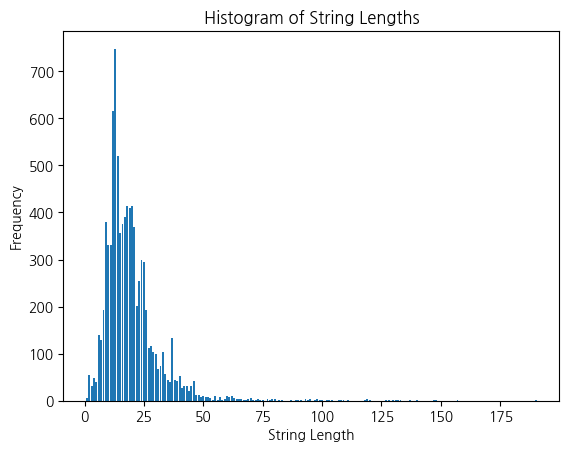

In [8]:
import csv
import matplotlib.pyplot as plt

# CSV 파일로부터 특정 컬럼 데이터 읽어오기
def read_column_from_csv(file_path, column_name):
    with open(file_path, 'r', encoding='utf-8') as csv_file:
        reader = csv.DictReader(csv_file)
        return [row[column_name] for row in reader]

# 문자열 길이에 따른 히스토그램 그리기
def plot_histogram(data):
    lengths = [len(item) for item in data]
    plt.hist(lengths, bins=range(1, max(lengths) + 2), align='left', rwidth=0.8)
    plt.xlabel('String Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of String Lengths')
    plt.show()

# 사용 예시
data = read_column_from_csv('data.csv', 'Sequence')
plot_histogram(data)


[2] amp 9개 분류로 나누어 csv, fasta file 만들기 (총 18개)

In [9]:
import csv
import numpy as np

def update_avg_dictionary(dictionary, key, values):
    if key in dictionary:
        counts, avg_values = dictionary[key]
        new_avgs = [(counts[i] * avg_values[i] + values[i]) / (counts[i] + 1) for i in range(len(values))]
        new_counts = [c + 1 for c in counts]
        dictionary[key] = (new_counts, new_avgs)
    else:
        dictionary[key] = ([1, 1], values)

has_duplicates = False  # initialize the flag before processing

def add_to_dictionary(dictionary, key, value):
    if key in dictionary:
        has_duplicates = True  # set the flag if a duplicate is found
        old_counts, old_values = dictionary[key]
        print(f"Duplicate key found: {key}")
        print(f"Existing counts: {old_counts}, Existing values: {old_values}")
        print(f"Existing log value: {np.log(old_values[1])}, New log value: {np.log(value)}")
        # Handle duplicates appropriately (e.g., updating average, adding to counts, etc.)
        # For simplicity, I'll leave it as-is for now, and just update the value
        dictionary[key] = (old_counts, [old_values[0], value])
    else:
        dictionary[key] = ([1, 1], [value, value])


def save_to_csv(dictionary, filename, op):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Seq", "Operator", "MIC1", "MIC2", "Log_MIC1", "Log_MIC2"]) # MIC1(ug/ml), MIC2(uM)
        
        for key, (counts, values) in dictionary.items():
            log_values = [np.log(value) for value in values]
            row = [key, op, values[0], values[1], log_values[0], log_values[1]]
            writer.writerow(row)


def save_to_fasta(dictionary, filename):
    with open(filename, 'w') as fastafile:
        for key, (counts, values) in dictionary.items():
            header = f">{key}, MIC(ug/ml)={values[0]}, MIC(uM)={values[1]}"
            fastafile.write(header + "\n" + key + "\n")


data = {}
eq_short, lg_short, ls_short = {}, {}, {}
eq_mid, lg_mid, ls_mid = {}, {}, {}
eq_long, lg_long, ls_long = {}, {}, {}


count_tot = 0
with open("data.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    name = next(reader)
    for header in name:
        data[header] = []

    for row in reader:
        for t in range(len(name)):
            data[name[t]].append(row[t])

    for l in range(1, len(data[name[0]])):
        key = data[name[0]][l]
        value = float(data[name[2]][l])
        length = len(key)

        if 1 <= length <= 4:
            dicts = (eq_short, lg_short, ls_short)
        elif 5 <= length <= 50:
            dicts = (eq_mid, lg_mid, ls_mid)
        else:
            dicts = (eq_long, lg_long, ls_long)
        
        operator = data[name[1]][l]
        if operator == "=":
            add_to_dictionary(dicts[0], key, value)
        elif operator == ">":
            add_to_dictionary(dicts[1], key, value)
        elif operator == "<":
            add_to_dictionary(dicts[2], key, value)
        count_tot += 1

dictionaries = [eq_short, lg_short, ls_short, eq_mid, lg_mid, ls_mid, eq_long, lg_long, ls_long]
operators = ["eq_short_or", "lg_short_or", "ls_short_or", "eq_mid_or", "lg_mid_or", "ls_mid_or", "eq_long_or", "lg_long_or", "ls_long_or"]

for dic, op in zip(dictionaries, operators):
    save_to_csv(dic, f"{op}.csv", op.split('_')[0])
    save_to_fasta(dic, f"{op}.fasta")

print("tot : " + str(count_tot))

print("len(eq_short) : " + str(len(eq_short)))
print("len(lg_short) : " + str(len(lg_short)))
print("len(ls_short) : " + str(len(ls_short)))

print("len(eq_mid) : " + str(len(eq_mid)))
print("len(lg_mid) : " + str(len(lg_mid)))
print("len(ls_mid) : " + str(len(ls_mid)))

print("len(eq_long) : " + str(len(eq_long)))
print("len(lg_long) : " + str(len(lg_long)))
print("len(ls_long) : " + str(len(ls_long)))

print(len(eq_short) + len(lg_short) + len(ls_short) + len(eq_mid) + len(lg_mid) + len(ls_mid) + len(eq_long) + len(lg_long) + len(ls_long))


if not has_duplicates:
    print("중복 없음")



tot : 9013
len(eq_short) : 91
len(lg_short) : 47
len(ls_short) : 0
len(eq_mid) : 7134
len(lg_mid) : 1526
len(ls_mid) : 41
len(eq_long) : 137
len(lg_long) : 35
len(ls_long) : 2
9013
중복 없음


[3] DB에 파일을 import하였고, python과 DB를 연결하여 sql문 작성하기

db sql python 연결하기

# mysql 라이브러리를 호출
import pymysql

#Database 접속
db = pymysql.connect(user='root', password='password', host='127.0.0.1', port=3306, db='dbname', charset='utf8)


#cursor 가져오기
cursor = db.cursor()

#sql 쿼리문 작성

sql = """
	select * from '테이블명';
"""

#쿼리 실행 
cursor.execute(sql)

#레코드를 배열 형식으로 받아오기
result = cursor.fetchall()

#반복문을 사용한 배열 데이터 출력

for data in result:
	print(data)

#실제 DB에 반영 하기 
db.commit()

#DB접속 종료하기 
db.close()

[*] table
[*] db : amp

[clustX]
eq_mid, eq_long, eq_short
ls_mid, ls_long, ls_short
lg_mid, lg_long, lg_short

[clustX_todo]

[clustO]

[clustO_todo]


In [10]:
import pymysql
conn = pymysql.connect(host='127.0.0.1', user='root', password='',db='amp', charset='utf8')

[*] SQL문 작성하기

In [11]:
cursor = conn.cursor()
sql = """
	select * from eq_mid;
"""
cursor.execute(sql)
result = cursor.fetchall()
for data in result:
	print(data)


('KALAKALAKLWKALAKAA', 'eq', 11.1980418, 11.1980418, 2.415738923729165, 2.415738923729165)
('GIGKFIHSAKKFGKLFVGEIMNS', 'eq', 71.50584165, 71.50584165, 4.269779147761186, 4.269779147761186)
('GIGHFLHKVKSFGKSWIGEIMNS', 'eq', 48.8866086, 48.8866086, 3.8895035062155756, 3.8895035062155756)
('KWKSFIKKLTSAAKKVTTAAKPLTK', 'eq', 2.0, 2.0, 0.6931471805599453, 0.6931471805599453)
('KWKSFIKNLTKGGSKILTTGLPALIS', 'eq', 4.0, 4.0, 1.3862943611198906, 1.3862943611198906)
('KWKLFKKIPKFLHLAKKF', 'eq', 6.9027465, 6.9027465, 1.9319193758831847, 1.9319193758831847)
('FHFHLHFPYPFIKHFIHRF', 'eq', 125.0, 125.0, 4.8283137373023015, 4.8283137373023015)
('FHFHLHFPSGSPFIKHFIHRF', 'eq', 125.0, 125.0, 4.8283137373023015, 4.8283137373023015)
('LIKHILHRLGGGFHFHLHF', 'eq', 250.0, 250.0, 5.521460917862246, 5.521460917862246)
('FHFHLHF', 'eq', 8.0, 8.0, 2.0794415416798357, 2.0794415416798357)
('KIKGAIKWKGAIKIKGAI', 'eq', 8.0, 8.0, 2.0794415416798357, 2.0794415416798357)
('KKLAGLAKKWAGLAKKLAGLA', 'eq', 8.0, 8.0, 2.079441

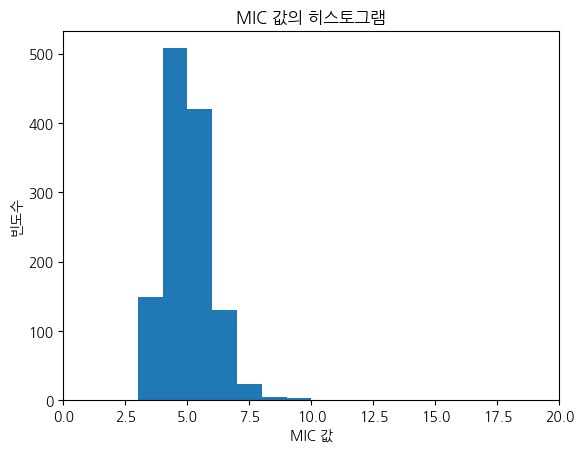

In [24]:
cursor = conn.cursor()

sql = """
    SELECT Log_MIC1 FROM lg_mid;
"""

# DB연결 끊김 방지
if not conn.open:
    conn.ping(reconnect=True)
try:
    cursor.execute(sql)
    result = cursor.fetchall()
except pymysql.InterfaceError:
    print("Database connection lost. Reconnecting...")
    conn.ping(reconnect=True)
    cursor.execute(sql)
    result = cursor.fetchall()

# result에서 MIC1 값을 추출
mic_values = [row[0] for row in result]

# 히스토그램 그리기
plt.hist(mic_values, bins=20, range=(0,20))  # bins는 히스토그램의 막대 개수를 조절합니다.
plt.xlabel('MIC 값')
plt.ylabel('빈도수')
plt.title('MIC 값의 히스토그램')
plt.xlim(0, 20)  # x축의 범위를 0부터 2500까지로 제한합니다.
plt.show()

# 커서와 데이터베이스 연결 닫기
cursor.close()
conn.close()


2500정도까지 값이 존재했고 100정도까지 가장 많았음

클러스터링 : uc format 확인하여 구분해야함

없어진 mic값 찾기 : 이것들도 넣어야함 (결과가 좋지 않을 때!)

In [14]:
cursor = conn.cursor()

def fetch_data(query):
    if not conn.open:
        conn.ping(reconnect=True)
    try:
        cursor.execute(query)
        return cursor.fetchall()
    except pymysql.InterfaceError:
        print("Database connection lost. Reconnecting...")
        conn.ping(reconnect=True)
        cursor.execute(query)
        return cursor.fetchall()

# eq_mid에 없고, eq_mid_or에서 MIC1 값이 1보다 작은 Seq를 찾는 쿼리 실행
sql_renew = """
SELECT o.Seq, o.MIC1
FROM eq_mid_or o
LEFT JOIN eq_mid m ON o.Seq = m.Seq
WHERE m.Seq IS NULL AND o.MIC1 < 1;
"""
missing_data = fetch_data(sql_renew)

# 결과 출력
for seq, mic in missing_data:
    print(f"Seq: {seq}, MIC1: {mic}")

# 찾은 데이터의 총 개수를 출력
print(f"\nTotal number of data points with MIC1 < 1 and not present in eq_mid: {len(missing_data)}")

Seq: ALWKTLLKKVLKAAAKAALNAVLVGANA, MIC1: 0.39
Seq: GNNRPIYIPQPRPPHPRL, MIC1: 0.175301571
Seq: GNNRPVYIPQPRPPHPR, MIC1: 0.1
Seq: KGRGKQGGKVRAKAKTRSS, MIC1: 0.999797
Seq: GWLKKIGKKIERVGQHTRDATIQGLGIAQQAANVAATAR, MIC1: 0.554233693
Seq: RPKHPIKHQGLPQEVLNENLLRF, MIC1: 0.198903312
Seq: RGRGKQGGKVRAKAKTRSS, MIC1: 0.5
Seq: RVVRQWPIGRVVRRVVRRVVR, MIC1: 0.75
Seq: RGGRLCYCRRRFCVCI, MIC1: 0.6
Seq: RRWCFRVCYKGRCRYKCR, MIC1: 0.25
Seq: CYCRIPACIAGERRYGTCIYQGRLWAFCC, MIC1: 0.832952739
Seq: DCYCRIPACIAGERRYGTCIYQGRLWAFCC, MIC1: 0.833833425
Seq: RKSKEKIGKEFKRIVQRIKDF, MIC1: 0.4
Seq: GKPRPYSPRPSSHPRPIRV, MIC1: 0.87380236
Seq: KKIGKKIERVGQHTRDATIQTIAVAQQAANVAATLKG, MIC1: 0.39155041
Seq: AWCFRVCYRGICYRRCR, MIC1: 0.03
Seq: KACFRVCYRGICYRRCR, MIC1: 0.25
Seq: KWCARVCYRGICYRRCR, MIC1: 0.125
Seq: KWCFAVCYRGICYRRCR, MIC1: 0.125
Seq: KWCFRACYRGICYRRCR, MIC1: 0.25
Seq: KWCFRVCARGICYRRCR, MIC1: 0.06
Seq: KWCFRVCYAGICYRRCR, MIC1: 0.125
Seq: KWCFRVCYRAICYRRCR, MIC1: 0.06
Seq: KWCFRVCYRGACYRRCR, MIC1: 0.125
Seq: KWCFR